In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# y_train=np.array(list(map(float,np.load("data/c.v 0.8_s.npy",allow_pickle=True))))
# labels.head(),labels.shape
features = pd.read_excel('data/promoter_w_20799.xlsx',header=None)
y_train = pd.read_excel('data/fluorescence_w_20799.xlsx',header=None).to_numpy(dtype=float)
min_label = y_train.min()
max_label = y_train.max()
# 计算每个区间的宽度
interval_width = (max_label - min_label) / 100

# 计算每个区间的中值
bin_centers = [min_label + interval_width * (i + 0.5) for i in range(100)]

# 将标签映射到区间的中值
mapped_labels = np.digitize(y_train, bin_centers) - 1  # 减1以将索引从0开始
mapped_labels = mapped_labels +1

/tmp/ipykernel_609691/636639380.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mapped_labels, shade=True)


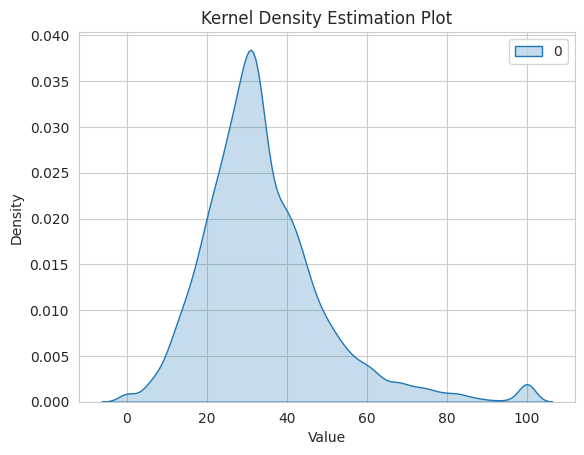

In [3]:
sns.set_style('whitegrid')
sns.kdeplot(mapped_labels, shade=True)
plt.title('Kernel Density Estimation Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


In [4]:
# 指定要保存的 Excel 文件名
# excel_file = 'data/dat2_mapped_fluorescence.xlsx'
# df = pd.DataFrame(mapped_labels)

# # 将 DataFrame 保存为 Excel 文件
# df.to_excel(excel_file, index=False,header=None)

# print(f"Mapped Labels saved to {excel_file}")

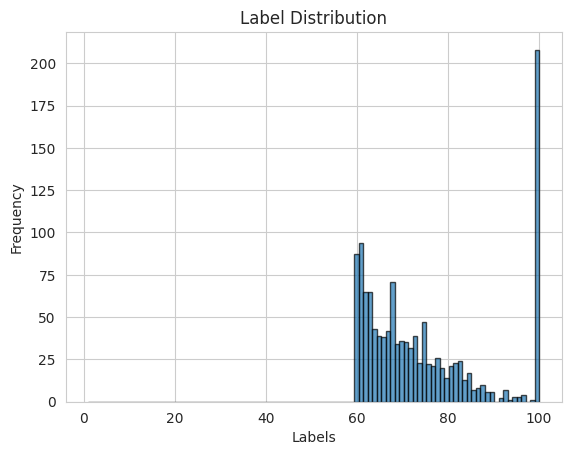

In [7]:
df = pd.DataFrame(mapped_labels)
# 抽取labels为60往上的数据，并返回index
df_index = df[df[0] >= 60].index
# 按照索引抽取features
features_index = features.loc[df_index]
df_index1 = df.loc[df_index]

plt.hist(df_index1, bins=100, range=(1, 100), edgecolor='black', alpha=0.7)

# 设置图表标题和标签
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Frequency')

# 显示图表
plt.show()

In [8]:
features_index.to_excel('data/features_index.xlsx',index=False,header=None)
df_index1.to_excel('data/df_index1.xlsx',index=False,header=None)